In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

blocks = pd.read_csv('../../Data\S_W_Intermediate\/Scaffold/Human_Gorilla/page_per_alignment/20230227_194638_blocks.csv')

In [143]:
blocks.head()

,species_scaffold,alignment_id,initial,final,length,match_perc
0,human_NC_000001.11,1,537107,539448,2341,[0.74379085]
1,Gorilla_NC_018424.2,1,639015,641200,2185,[0.74379085]
2,human_NC_000019.10,2,556093,557649,1556,[0.73333333]
3,Gorilla_NC_018443.2,2,656778,658239,1461,[0.73333333]
4,human_NC_000002.12,3,540230,540980,750,[0.78337875]


In [152]:
# Split the value in species_scaffold in two columns
blocks[['species', 'scaffold']] = blocks.species_scaffold.str.split('_', 1, expand=True)

C:\Users\bertr\AppData\Local\Temp\ipykernel_29840\560339340.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  blocks[['species', 'scaffold']] = blocks.species_scaffold.str.split('_', 1, expand=True)


In [147]:
blocks.head()

,species_scaffold,alignment_id,initial,final,length,match_perc,species,scaffold
0,human_NC_000001.11,1,537107,539448,2341,[0.74379085],human,NC_000001.11
1,Gorilla_NC_018424.2,1,639015,641200,2185,[0.74379085],Gorilla,NC_018424.2
2,human_NC_000019.10,2,556093,557649,1556,[0.73333333],human,NC_000019.10
3,Gorilla_NC_018443.2,2,656778,658239,1461,[0.73333333],Gorilla,NC_018443.2
4,human_NC_000002.12,3,540230,540980,750,[0.78337875],human,NC_000002.12


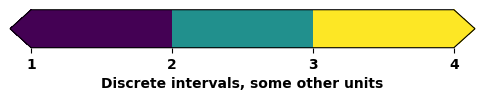

In [11]:
# Map each alignment block to a color

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis # There are multiple options

bounds = blocks.alignment_id.unique()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

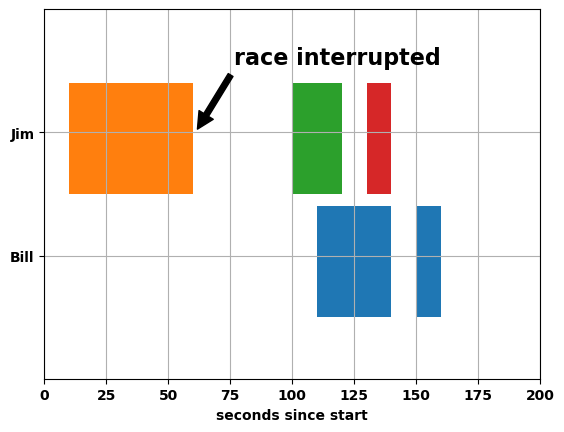

In [13]:
# One possible solution: this creates like a horizontal bar plot with gaps
# each small horizontal bar is a block representing an alignment

import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)],
                (10, 9), # represents the y coordinates of this bar, where starts and its height
                facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

C:\Users\bertr\AppData\Local\Temp\ipykernel_29840\2871664913.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  blocks_dict = blocks.groupby('alignment_id')['initial_length', 'species_id'].apply(lambda x: x.values.tolist()).to_dict()


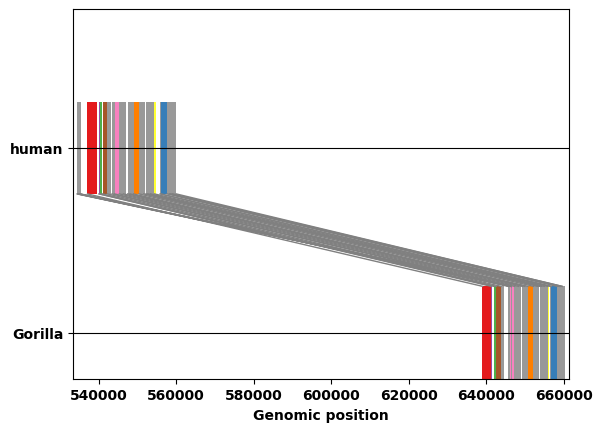

In [153]:
# Create a color mapping per each alignment_id
# Create a dictionary where the key is the alignment_id and the value is the color
# The color should be a tuple of RGB values
cmap = mpl.cm.Set1 # There are multiple options
color_mapping = {key:cmap(i) for i, key in enumerate(blocks.alignment_id.unique())}

# Create identifier values per each species
blocks['species_id'] = blocks.groupby('species').ngroup()

# Compute the length of the aligned sequence
blocks['length'] = blocks['end'] - blocks['start']

# Create a tuple of the start and length of each block
blocks['start_length'] = blocks.apply(lambda x: (x.start, x.length), axis=1)

# Create a dictionary where the key is the alignment_id and the value is the array of tuples, including the species_id
blocks_dict = blocks.groupby('alignment_id')['start_length', 'species_id'].apply(lambda x: x.values.tolist()).to_dict()

# Start plotting
fig, ax = plt.subplots()

# Each key is an alignment_id, which determines the color of the bar
# Create a mapping for that and implement it in the plot
# Each block is represented per species, so we need a y-level per each species
# The y-level is determined by the species_id
# The x-level is determined by the start and length of the block
for key, value in blocks_dict.items():
    for i in value:
        ax.broken_barh([i[0]],  # start and length x-axis
             (i[1], 0.5),         # start and height y-axis
             facecolors=color_mapping[key])

    # Add a line between the blocks for each alignment_id
    # The start positions of each block are connected by a line
    ax.plot([value[0][0][0], value[1][0][0]],
            [1, 0.5], #[i[1] for i in value], 
            color='grey', 
            linestyle='-', 
            linewidth=1)

    # The end positions of each block are connected by a line
    ax.plot([value[0][0][1], value[1][0][1]],
            [1, 0.5], #[i[1] for i in value], 
            color='grey', 
            linestyle='-', 
            linewidth=1)
    
    
ax.set_ylim(0, blocks.species.nunique())
ax.set_xlim(min(blocks.start) - 1000, max(blocks.end) + 1000)
ax.set_xlabel('Genomic position')
ax.set_yticks([i[1] + 0.25 for i in value], labels=blocks.species.unique())     # Modify y-axis tick labels
ax.grid(True, axis='y', linestyle='-', color='black')                                       # Make grid lines visible
#ax.annotate <-- add a message

In [109]:
blocks_dict

{1: [[(537107, 2341), 1], [(639015, 2185), 0]],
 2: [[(556093, 1556), 1], [(656778, 1461), 0]],
 3: [[(540067, 159), 1], [(641255, 132), 0]],
 4: [[(540230, 750), 1], [(641895, 687), 0]]}

In [95]:
value[0][0]

(540230, 750)

In [ ]:
color_mapping[]

In [68]:
blocks_dict.items()

dict_items([(1, [[(537107, 2341), 1], [(639015, 2185), 0]]), (2, [[(556093, 1556), 1], [(656778, 1461), 0]]), (3, [[(540067, 159), 1], [(641255, 132), 0]]), (4, [[(540230, 750), 1], [(641895, 687), 0]])])

In [64]:
blocks_dict[key][0][0]

540230

In [59]:
blocks_dict.items()

dict_items([(1, [(537107, 2341), (639015, 2185)]), (2, [(556093, 1556), (656778, 1461)]), (3, [(540067, 159), (641255, 132)]), (4, [(540230, 750), (641895, 687)])])

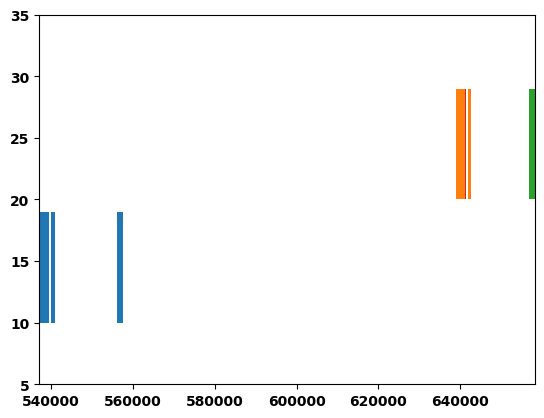

In [33]:
# Try to adapt to our data

import matplotlib.pyplot as plt

# Horizontal bar plot with gaps
fig, ax = plt.subplots()

# human
ax.broken_barh(x1,
                (10, 9), # represents the y coordinates of this bar, where starts and its height
                facecolors='tab:blue')
                
ax.broken_barh(x2, (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(min(blocks.start), max(blocks.end))
'''ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25], labels=['Bill', 'Jim'])     # Modify y-axis tick labels
ax.grid(True)                                       # Make grid lines visible
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')'''

plt.show()


In [18]:
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

AttributeError: 'Line2D' object has no property 'x_lim'

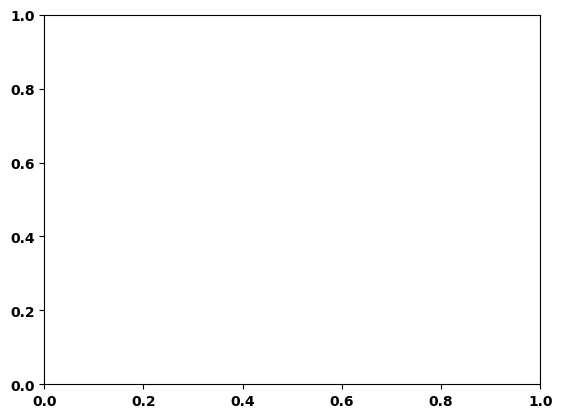

In [19]:
plt.plot(
    axes,
    x_lim=(0, 10), #max([len(rec) for rec in self.records.values()])),
    with_ruler=(axes == axes[-1]),
)